In [ ]:
# https://www.kaggle.com/code/shawamar/product-recommendation-system-for-e-commerce

### Recommendation System - Part I

In [ ]:
# Recommendation System - Part I
# Product popularity based recommendation system targeted at new customers
# Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings = pd.read_csv('E:/Kaggle_Practice/Amazon Product Review Dataset/ratings_Beauty.csv')
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
amazon_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [4]:
amazon_ratings.shape

(2023070, 4)

In [5]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [6]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='ProductId'>

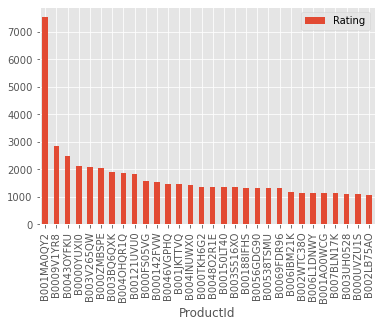

In [7]:
most_popular.head(30).plot(kind = "bar")

In [ ]:
# Analysis:

# The above graph gives us the most popular products (arranged in descending order) sold by the business.

#For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

### Recommendation System - Part II

In [ ]:
# Model-based collaborative filtering system
# Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
# A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

In [ ]:
# https://www.sallys.space/blog/2018/05/16/intro-to-resys/
# Utility Matrix based on products sold and user reviews
# Utility Matrix : An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [8]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [11]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [12]:
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
# Transposing the matrix

In [13]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.shape

(886, 9697)

In [ ]:
# Unique products in subset of data

In [15]:
X1 = X

In [ ]:
# Decomposing the Matrix

In [16]:
SVD = TruncatedSVD(n_components=10) # 특이값 분해
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
# Correlation Matrix

In [17]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [18]:
X.index[99]

'6117036094'

In [ ]:
# Index # of product ID purchased by customer

In [19]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [ ]:
# Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [20]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
# Recommending top 10 highly correlated products in sequence

In [21]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '1451646526',
 '1987958179',
 '322700075X',
 '3292000971',
 '5357955905',
 '5357956014',
 '5357956111',
 '6022600685']

In [ ]:
# Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

### Recommendation System - Part III

In [ ]:
# For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.
# Dataset : Home Depot's dataset with product dataset

In [22]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Item to item based recommendation system based on product description
# Applicable when business is setting up its E-commerce website for the first time

In [23]:
product_descriptions = pd.read_csv('E:/Kaggle_Practice/Home Depot Product Search Relevance/product_descriptions.csv')
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [25]:
product_descriptions.shape

(124428, 2)

In [26]:
product_descriptions.isnull().sum()

product_uid            0
product_description    0
dtype: int64

In [27]:
product_descriptions.dropna() # missing value 채우기

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
...,...,...
124423,224424,Create a neat yet stylish storage space for or...
124424,224425,Our Bullnose Adirondack Chair Cushions fit Adi...
124425,224426,Joist hangers are designed to provide support ...
124426,224427,These socket cap screws are ideal for applicat...


In [29]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [ ]:
# Feature extraction from product descriptions
# Converting the text in product description into numerical data for analysis

In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

In [ ]:
# Visualizing product clusters in subset of data

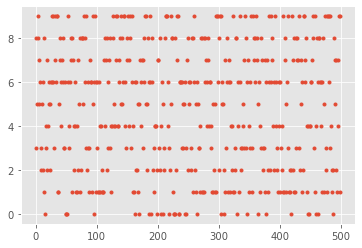

In [31]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [32]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
# output
# Recommendation of product based on the current product selected by user.
# To recommend related product based on, Frequently bought together.

In [ ]:
# Top words in each cluster based on product description

In [33]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 power
 light
 led
 cutting
 volt
 watt
 tool
 saw
 plan
 protection
Cluster 1:
 moulding
 painted
 fan
 ft
 home
 touch
 match
 project
 base
 primed
Cluster 2:
 frame
 patio
 collection
 fabric
 aluminum
 steel
 outdoor
 bronze
 dining
 rust
Cluster 3:
 post
 wood
 product
 outdoor
 door
 vary
 rug
 hole
 treated
 help
Cluster 4:
 metal
 steel
 screw
 screws
 gauge
 drill
 work
 use
 pre
 azek
Cluster 5:
 insulation
 attic
 easy
 radiant
 install
 energy
 fiberglass
 ladder
 walls
 cover
Cluster 6:
 water
 toilet
 tank
 flush
 bowl
 piece
 heater
 gal
 wash
 easy
Cluster 7:
 air
 window
 installation
 room
 easy
 use
 unit
 storage
 natural
 cooling
Cluster 8:
 water
 concrete
 use
 ft
 provides
 paint
 sq
 seal
 watering
 easy
Cluster 9:
 wall
 plate
 panels
 speaker
 connect
 center
 home
 screen
 cabinet
 finish


C:\Users\katenam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Predicting clusters based on key search words

In [34]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [35]:
show_recommendations("cutting tool") # keyword : cutting tool

Cluster 0:
 power
 light
 led
 cutting
 volt
 watt
 tool
 saw
 plan
 protection


In [36]:
show_recommendations("spray paint")

Cluster 8:
 water
 concrete
 use
 ft
 provides
 paint
 sq
 seal
 watering
 easy


In [ ]:
# In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

In [37]:
show_recommendations("water")

Cluster 6:
 water
 toilet
 tank
 flush
 bowl
 piece
 heater
 gal
 wash
 easy


In [ ]:
# Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.